### Computations and plots for project in TMA4180 Optimization 1 

Import necessary functions

In [1]:
from project_definitions import *

### Part 1 - Cable networks with external nodes
Methods:
- gradient descent with constant stepsize, armijo condition and strong/weak wolfe conditions. 
- BFGS with strong wolfe condition

Constraint:
- fixed nodes 

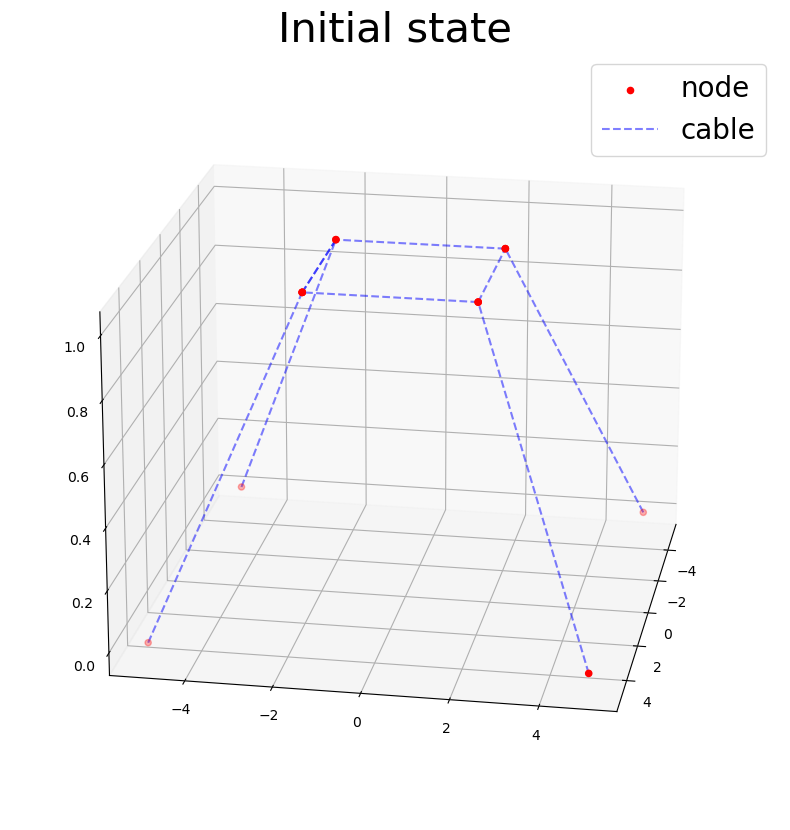

In [8]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
X[:,0] = [5,5,0]
X[:,1] = [-5,5,0]
X[:,2] = [-5,-5,0]
X[:,3] = [5,-5,0]
X[:,4] = [2,2,1]
X[:,5] = [-2,2,1]
X[:,6] = [-2,-2, 1]
X[:,7] = [2,-2, 1]

mg = 1/6
pg = 0
k = 3 
c = 0

edges = np.array([[1,5], [5,6], [4,5], [2,6], [6,7], [3,7], [4,7], [0,4]])
create_edge(A, edges, 1)
B = np.zeros_like(A)
L = 3*np.ones_like(A)
fixed_points = [0,1,2,3]

plt.figure(figsize=(10,10))
ax0 = plt.axes(projection = '3d')
plot_cable_net(X, A, ax0)
ax0.view_init(20,10)
ax0.set_title(f'Initial state', fontsize = 30)
np.set_printoptions(precision = 5)

plt.savefig('inital_state_cable_net.png')

Gradient descent with strong wolfe condition

number of gradient descent steps = 133, number of step size optimization = 338, norm of gradient = 9.41521748362786e-09, Energy = 1.1666666666666667
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


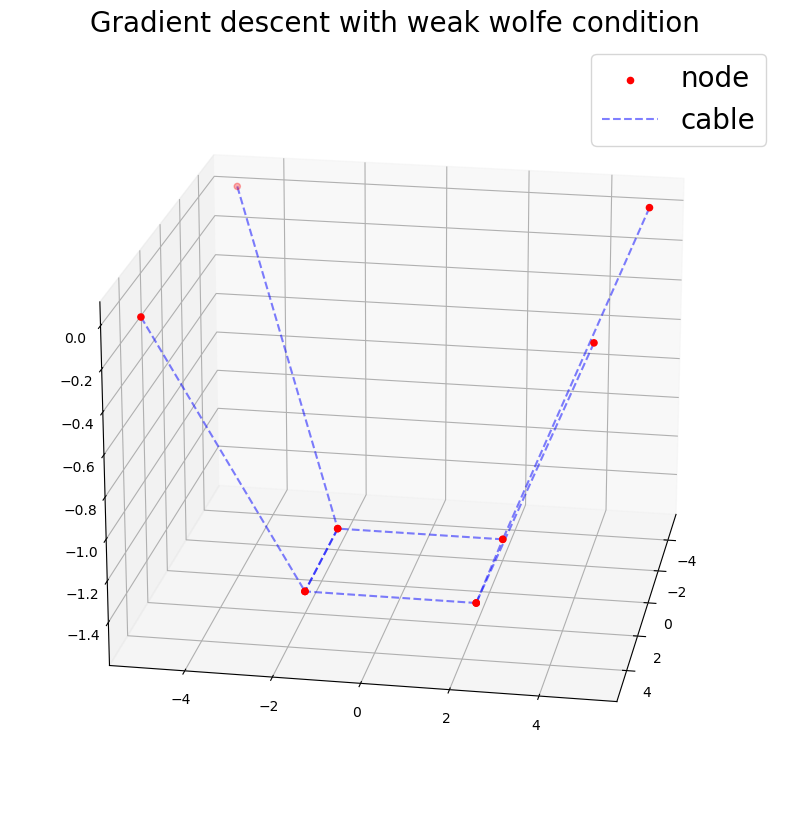

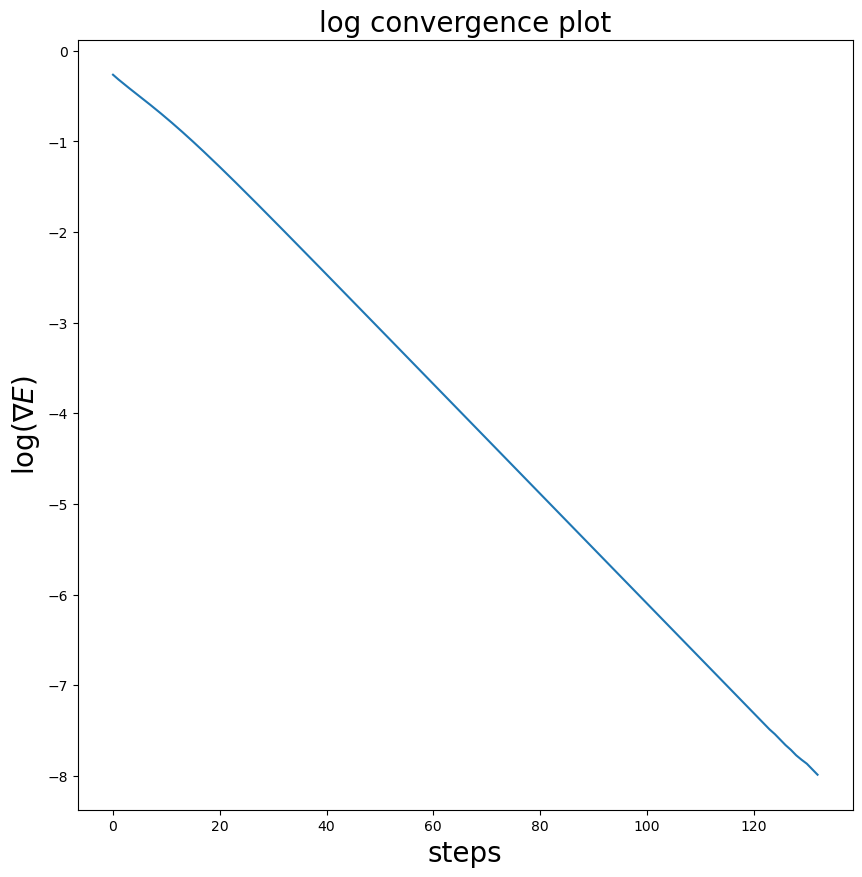

In [11]:

plt.figure(figsize=(10,10))
ax3 = plt.axes(projection = '3d')
X_strong_wolfe, error_strong_wolfe = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-8, weak_w = True, alpha_0 = 10)
plot_cable_net(X_strong_wolfe, A, ax3)
ax3.view_init(20,10)
ax3.set_title(f'Gradient descent with weak wolfe condition', fontsize = 20)
plt.savefig('GD_strong_wolfe_cable_net.png')
print(X_strong_wolfe)

index = range(len(error_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_GD_weak_wolfe_net.png')

BFGS 

number of BFGS steps = 7, number of step size optimization = 6, norm of gradient = 9.78947129508623e-11, Energy = 1.1666666666666679
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


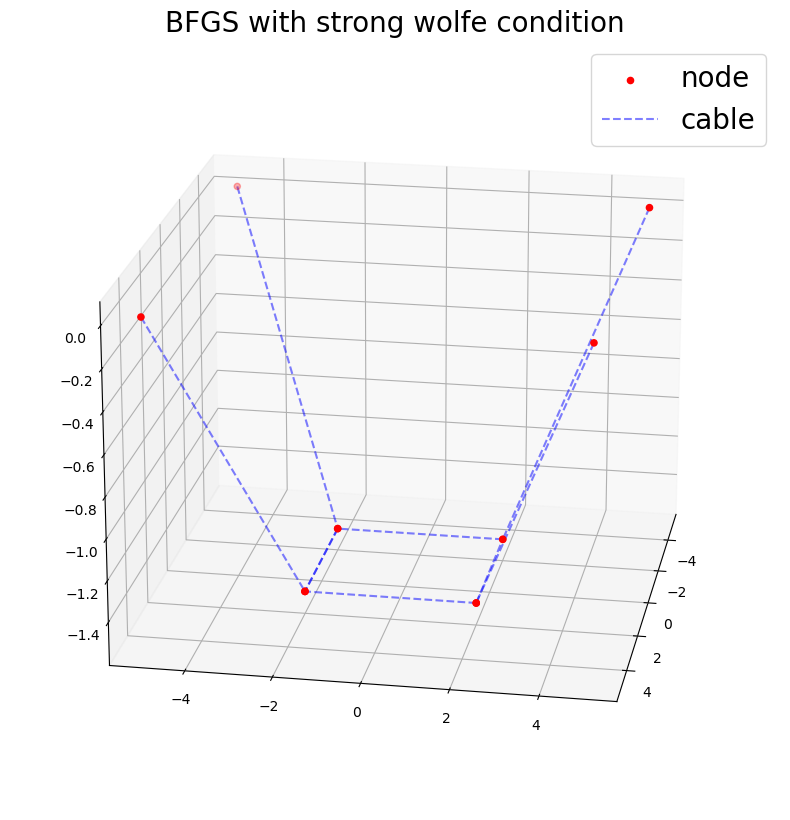

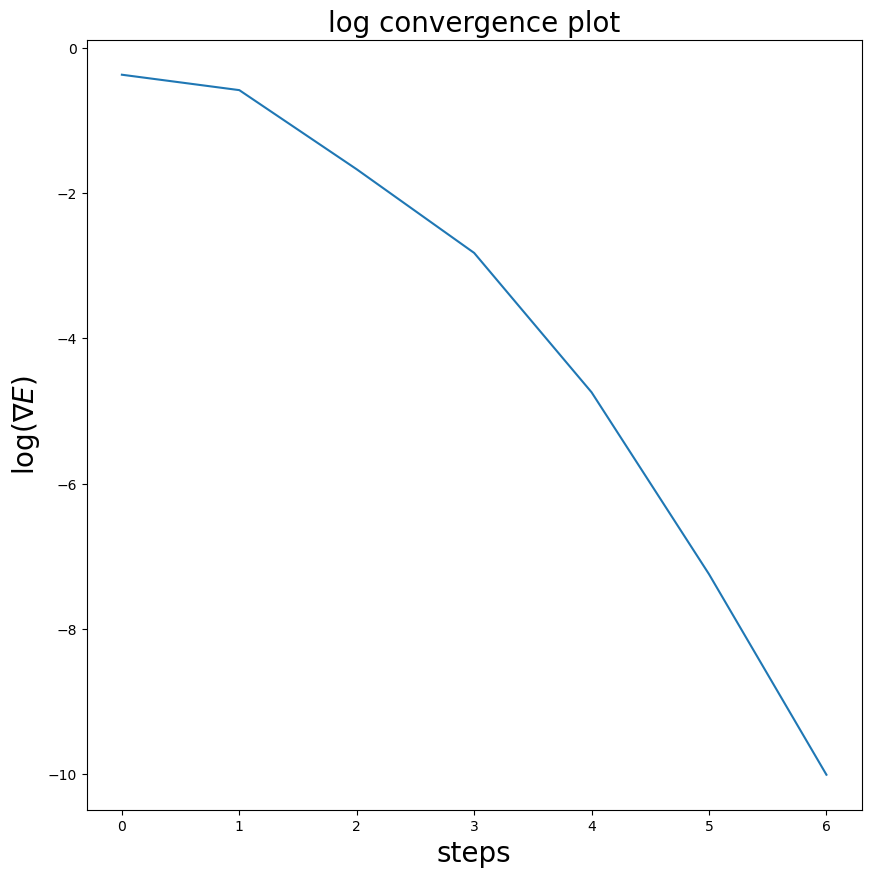

In [12]:

plt.figure(figsize=(10,10))
ax4 = plt.axes(projection = '3d')
X_BFGS, error_BFGS_alt_strong_wolfe= BFGS(E,gradient_E, np.copy(X), A, B, L, fixed_points, mg , pg, k, c , tol = 1e-10, strong_w = True)
plot_cable_net(X_BFGS, A, ax4)
ax4.view_init(20,10)
ax4.set_title(f'BFGS with strong wolfe condition', fontsize = 20)
plt.savefig('BFGS_alt_strong_wolfe_cable_net.png')
print(X_BFGS)

index = range(len(error_BFGS_alt_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_alt_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_net.png')

### Part 2 network with cables, bars and external nodes
Methods:
- gradient descent with constant stepsize, armijo condition and strong/weak wolfe conditions. 
- BFGS with strong wolfe condition

Constraint:
- Fixed nodes

In [13]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/2
c = 1
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  


cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = [0,1,2,3]
L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,edges, 1)


Set all weight equal to zero, $k = 0.1$ and $c=1$

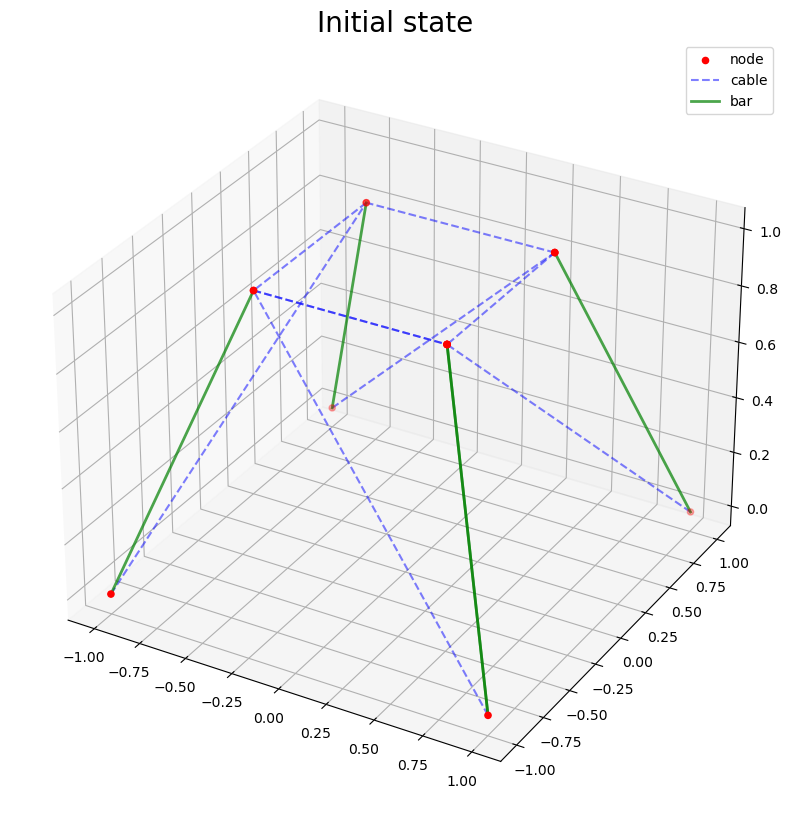

In [14]:
mg, pg, k, c = 0, 0, 0.1, 1
mu = 0

plt.figure(figsize=(10,10))
ax0 = plt.axes(projection = '3d')
plot_cable_net(X,A,ax0)
plot_bar_net(X,B,ax0)
ax0.set_title(f'Initial state', fontsize = 20)
plt.savefig('initial_state_tensegrity_dome.png')


Gradient descent with strong wolfe condtion

number of gradient descent steps = 1000, number of step size optimization = 3496, norm of gradient = 2.0347760792718545e-08, Energy = 0.009285570216405921
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00 -7.09710e-01
   1.02561e-05  7.09710e-01 -1.02561e-05]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00 -1.02561e-05
  -7.09710e-01  1.02561e-05  7.09710e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  9.54287e+00
   9.54287e+00  9.54287e+00  9.54287e+00]]


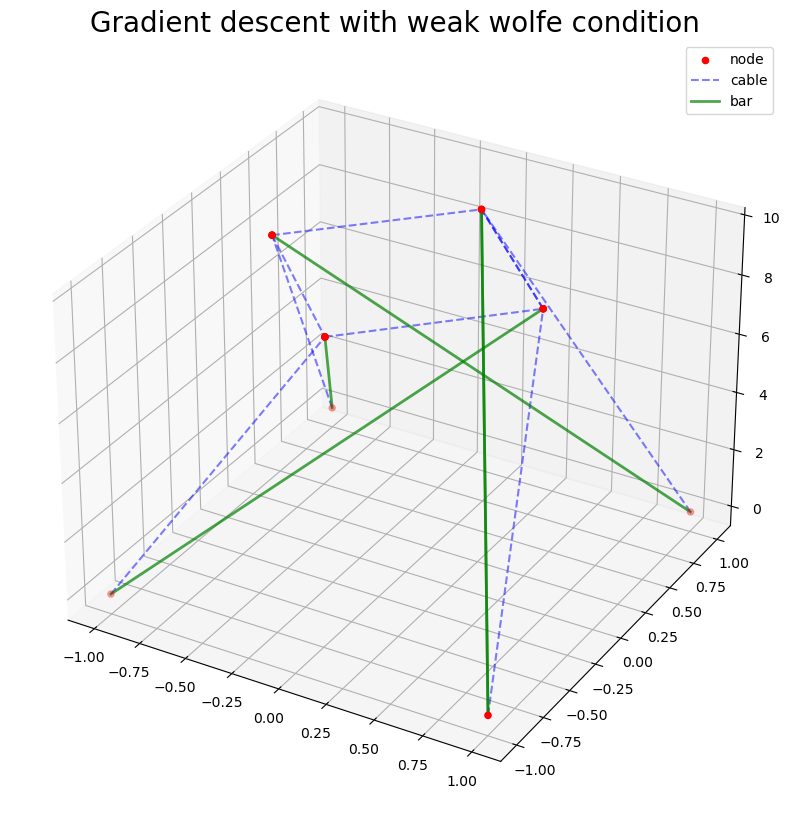

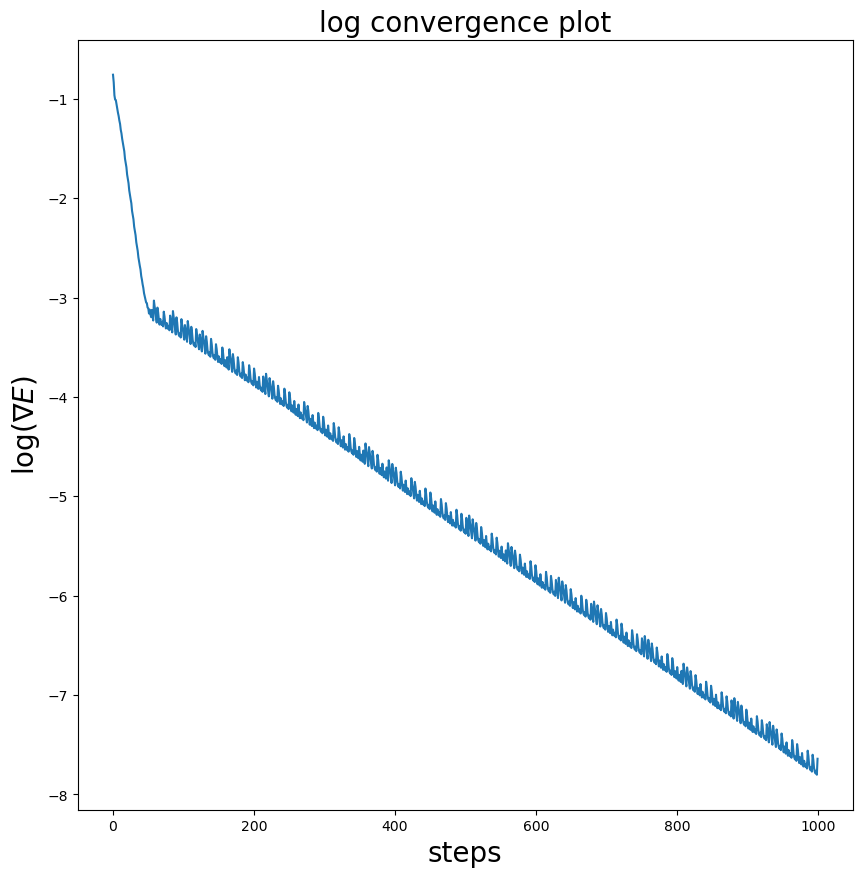

In [16]:
X_strong_wolfe, error_strong_wolfe = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, weak_w = True)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')

plot_cable_net(X_strong_wolfe, A, ax1)
plot_bar_net(X_strong_wolfe, B, ax1)
ax1.set_title(f'Gradient descent with weak wolfe condition', fontsize = 20)
plt.savefig('GD_strong_wolfe_tensegrity_dome.png')
print(X_strong_wolfe)

index = range(len(error_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_GD_weak_wolfe_tensegrity_dome.png')

number of BFGS steps = 38, number of step size optimization = 44, norm of gradient = 7.334538314587983e-14, Energy = 0.009285570216250965
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00 -7.09710e-01
   3.32767e-12  7.09710e-01 -3.32854e-12]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00 -3.32860e-12
  -7.09710e-01  3.33028e-12  7.09710e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  9.54287e+00
   9.54287e+00  9.54287e+00  9.54287e+00]]


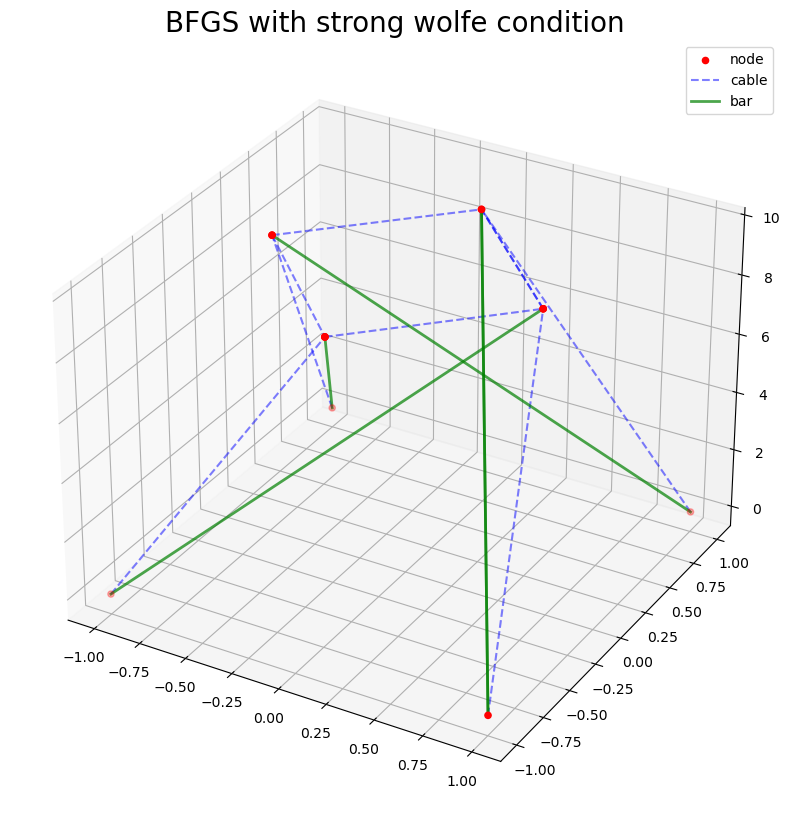

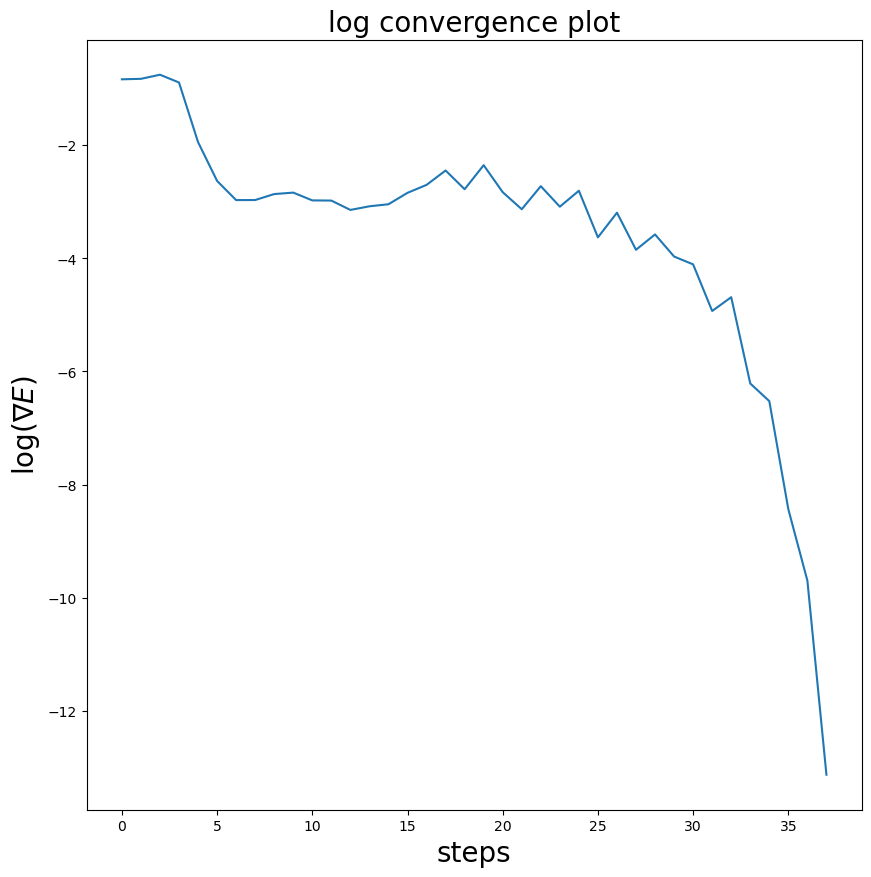

In [17]:
mg, pg, k, c = 0, 0, 0.1,1
X_BFGS, error_BFGS_strong_wolfe = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-12, strong_w= True)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')

plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS with strong wolfe condition', fontsize = 20)
plt.savefig('BFGS_alt_strong_wolfe_tensegrity_dome.png')
print(X_BFGS)

index = range(len(error_BFGS_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_tensegrity_dome.png')

Change of parameters. Give weight to external loads and bars. Stiffen material parameters

number of BFGS steps = 24, number of step size optimization = 26, norm of gradient = 3.0279248498123334e-11, Energy = 0.028319291067014002
[[ 1.      -1.      -1.       1.      -0.70701  0.06635  0.70701 -0.06635]
 [ 1.       1.      -1.      -1.      -0.06635 -0.70701  0.06635  0.70701]
 [ 0.       0.       0.       0.       9.49108  9.49108  9.49108  9.49108]]


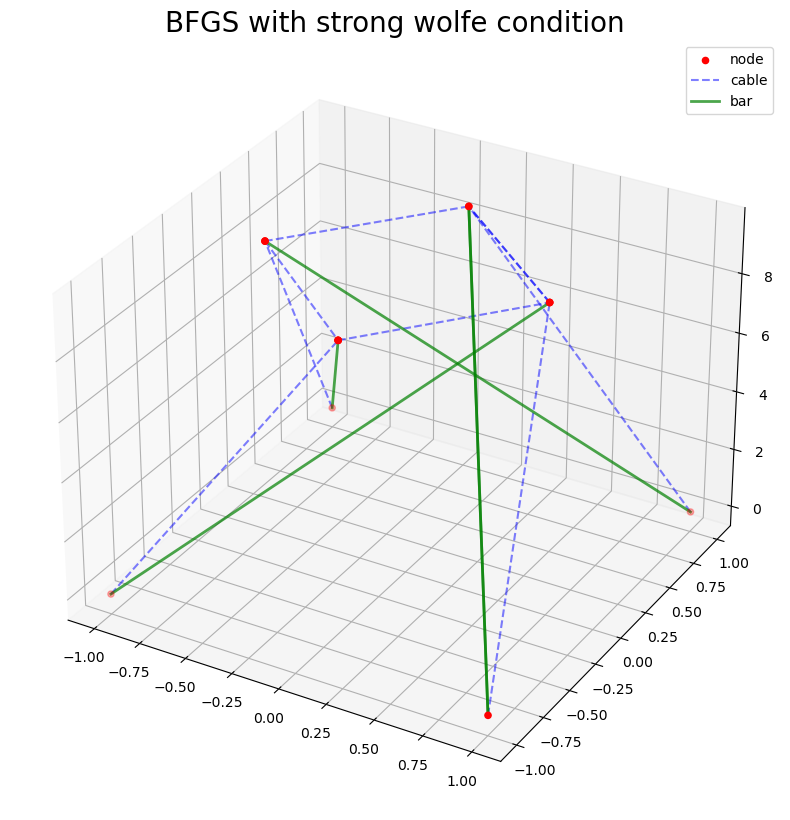

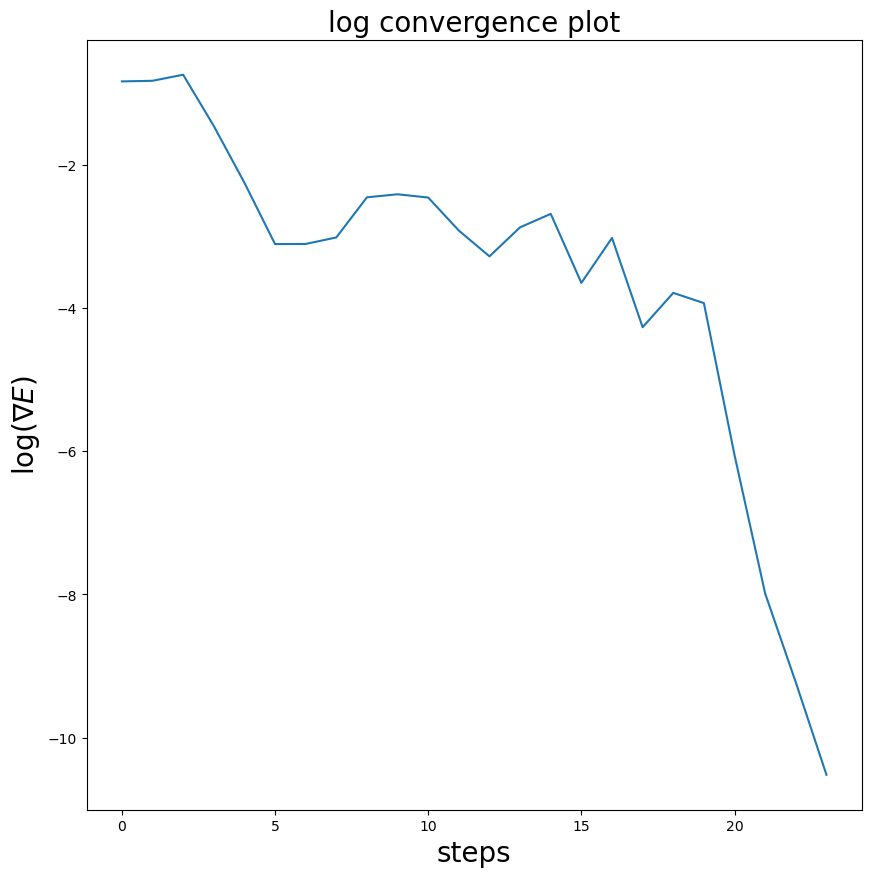

In [18]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/2
c = 1
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  

cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = [0,1,2,3]
L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,edges, 1)

mg, pg, k, c = 0, 1e-4, 0.1, 1
fixed_points = [0,1,2,3]
X_BFGS, error_BFGS_alt_strong_wolfe = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, strong_w= True, tol = 1e-10)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')
plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS with strong wolfe condition' , fontsize = 20)
plt.savefig('BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')
print(X_BFGS)

index = range(len(error_BFGS_alt_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_alt_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')

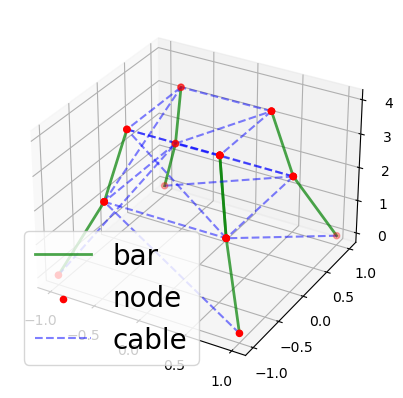

In [19]:
N = 12
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
L = np.ones((N,N))
a = 1
b = 2/3
c = 2
d = 1/2
e = 4
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  

X[:,8] = [d,d,e]
X[:,9] = [-d,d,e]
X[:,10] = [-d,-d,e]
X[:,11] = [d,-d,e]  


cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4], [4,11], [5,8], [6,9], [7,10], [8,9], [9,10], [10,11], [8,11]]) 
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7], [4,8], [5,9],[6,10],[7,11]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = [0,1,2,3]

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,cable_edges, 2)
create_edge(L,bar_edges, 1.4)

ax1 = plt.axes(projection = '3d')
plot_bar_net(X, B, ax1)
plot_cable_net(X, A, ax1)

number of BFGS steps = 311, number of step size optimization = 242, norm of gradient = 9.04999738132332e-11, Energy = -0.001492583776110907
[[ 1.      -1.      -1.       1.       0.51276 -0.96086 -0.51276  0.96086
   0.40977 -0.92954 -0.40977  0.92954]
 [ 1.       1.      -1.      -1.       0.96086  0.51276 -0.96086 -0.51276
   0.92954  0.40977 -0.92954 -0.40977]
 [ 0.       0.       0.       0.      -1.31225 -1.31225 -1.31225 -1.31225
  -2.70824 -2.70824 -2.70824 -2.70824]]


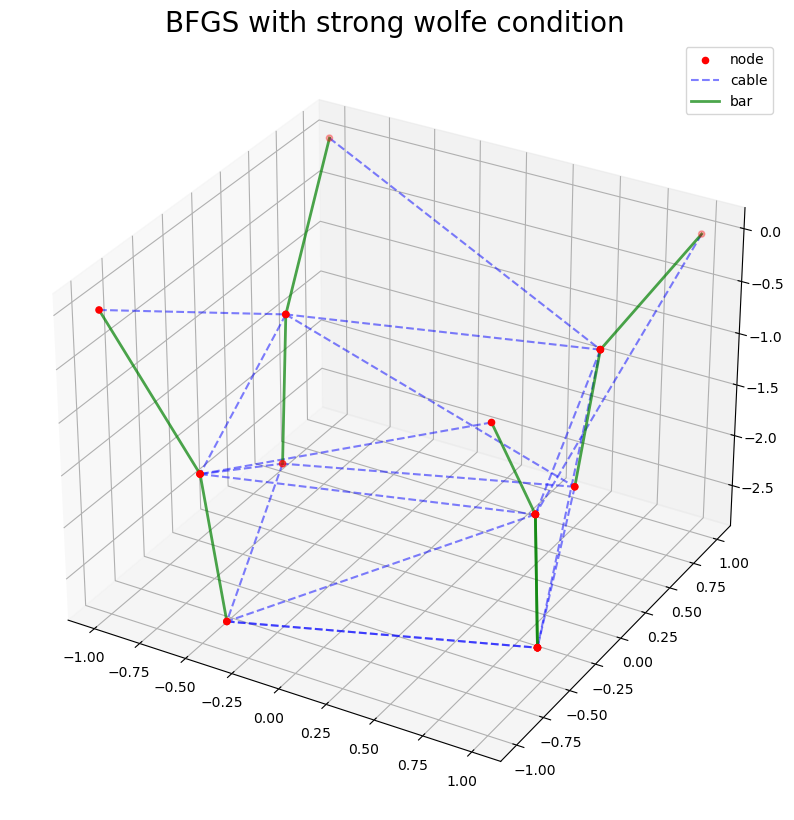

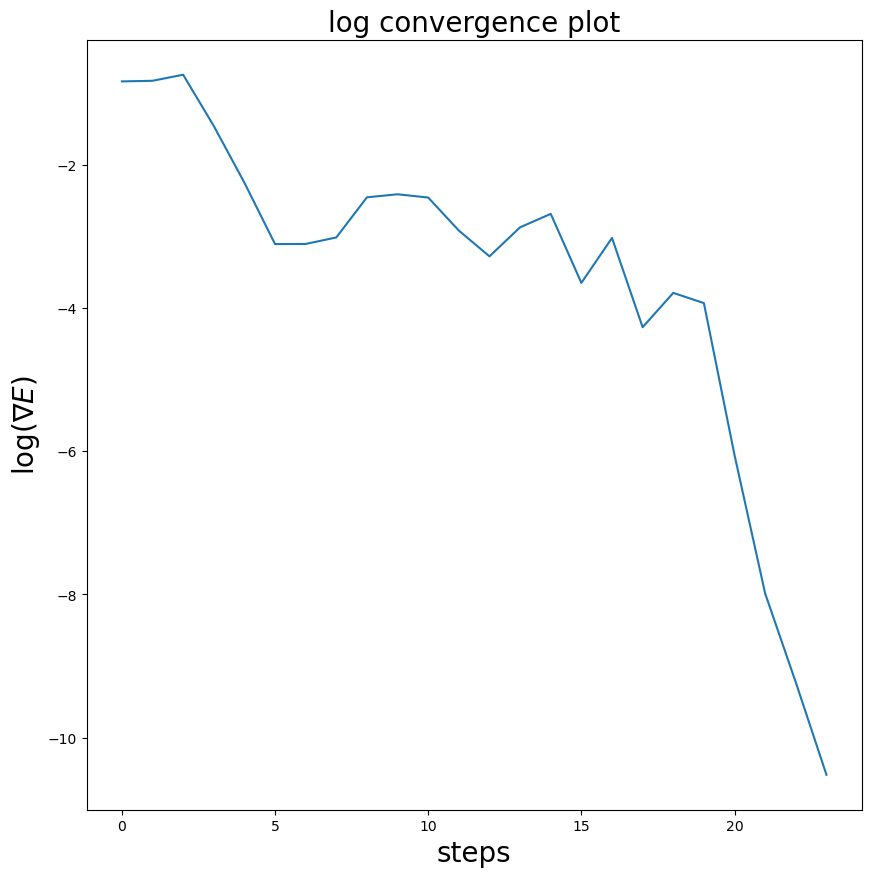

In [20]:
mg, pg, k, c = 0, 1e-4, 0.1, 1
X_BFGS, error_BFGS = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-10, strong_w = True)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection = '3d')
plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS with strong wolfe condition' , fontsize = 20)
plt.savefig('BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')
print(X_BFGS)

index = range(len(error_BFGS_alt_strong_wolfe))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_alt_strong_wolfe))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_alt_strong_wolfe_tensegrity_dome_with_weight.png')

### Part 3 Constrained optimization 

methods:
- Quadrative penalty method with BFGS as free optimization technique 

constraints:
- $x_i^3 \geq f(x_i^1, x_i^2)$

In [23]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/3
e = 8
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,e]
X[:,5] = [-b,b,e]
X[:,6] = [-b,-b,e]
X[:,7] = [b,-b,e]  
#X[:,4:] = np.random.randint(-10, 10, size = (np.shape(X[:,4:])))

cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4],[0,1], [1,2], [2,3], [3,0]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
create_edge(A, cable_edges,1)
create_edge(B, bar_edges,1)
fixed_points = []
L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,edges, 1)
edges = np.array([[0,1], [1,2], [2,3], [3,0]])
create_edge(L,edges, 2)

In [26]:
fixed_points = []
mg, pg, k, c = 0, 1e-4, 0.1, 1
mu = 1
X_BFGS = np.copy(X)
for i in range(5):
    X_BFGS, error_BFGS_constrained = BFGS(quad_penalty, gradient_quad_penalty, np.copy(X_BFGS), A, B, L, fixed_points, mg, pg, k, c, mu, tol = 1e-8, strong_w= True)
    mu *= 10
print(np.sum(constraint(X_BFGS)**2))
print(X_BFGS)
print(mu)

number of BFGS steps = 43, number of step size optimization = 59, norm of gradient = 7.881106187596855e-11, Energy = 0.028715423909962953
number of BFGS steps = 27, number of step size optimization = 26, norm of gradient = 1.8093927983770654e-10, Energy = 0.028717223909962942
number of BFGS steps = 32, number of step size optimization = 36, norm of gradient = 3.0257501945971287e-09, Energy = 0.02871740390996431
number of BFGS steps = 25, number of step size optimization = 53, norm of gradient = 1.6778859433010772e-10, Energy = 0.028717421909962952
number of BFGS steps = 19, number of step size optimization = 70, norm of gradient = 9.17349933180024e-09, Energy = 0.028717423709962955
3.999964977216925e-14
[[ 1.13711 -0.84807 -1.13711  0.84807 -0.7092  -0.03619  0.7092   0.03619]
 [ 0.84807  1.13711 -0.84807 -1.13711  0.03619 -0.7092  -0.03619  0.7092 ]
 [ 0.10061  0.10061  0.10061  0.10061  9.59084  9.59084  9.59084  9.59084]]
100000


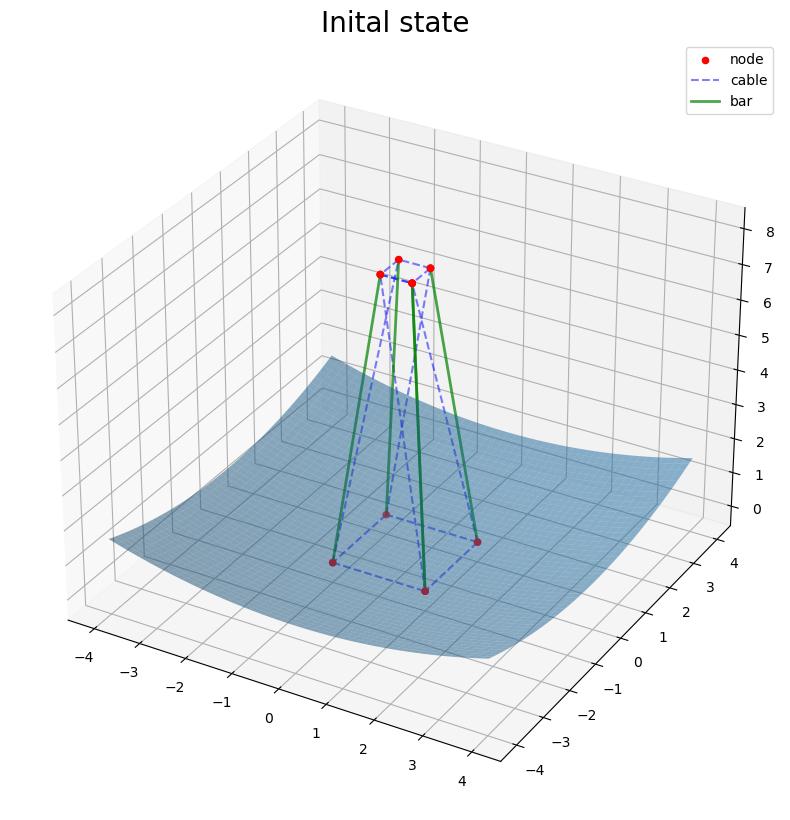

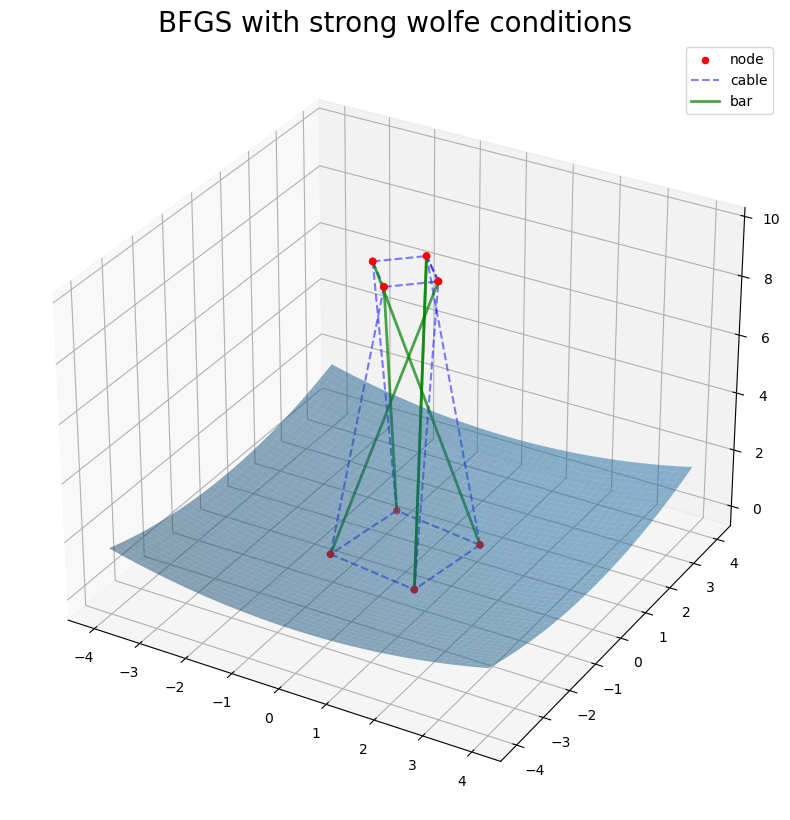

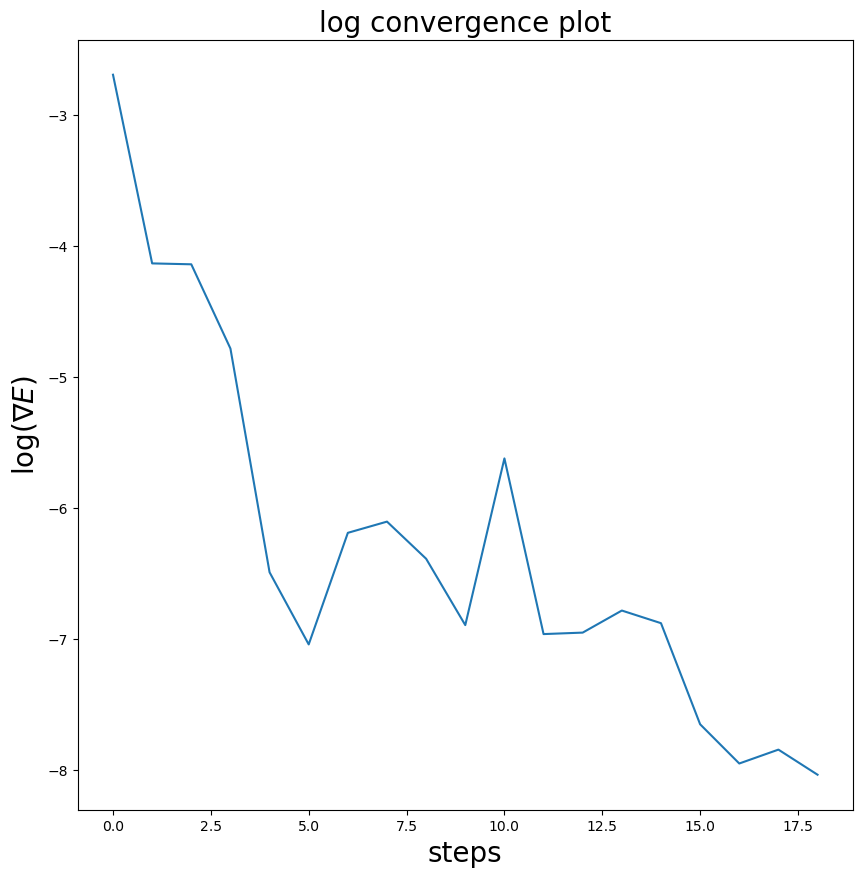

In [27]:
x = np.linspace(-4,4, 1000)
y = np.copy(x)
X1,Y1 = np.meshgrid(x,y)
z = (X1**2 + Y1**2)/20

plt.figure(figsize=(10,10))
ax0 = plt.axes(projection = '3d')
plot_cable_net(X, A, ax0)
plot_bar_net(X, B, ax0)
ax0.plot_surface(X1,Y1,z, alpha = 0.5)
ax0.set_title('Inital state', fontsize = 20)
plt.savefig('inital_state_constrained.png')

plt.figure(figsize=(10,10))
ax0 = plt.axes(projection = '3d')
ax0.plot_surface(X1,Y1,z, alpha = 0.5)
plot_cable_net(X_BFGS, A, ax0)
plot_bar_net(X_BFGS, B, ax0) 
ax0.set_title(f'BFGS with strong wolfe conditions', fontsize = 20)
plt.savefig('BFGS_strong_wolfe_tensegrity_dome_constrained.png')

index = range(len(error_BFGS_constrained))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_constrained))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.savefig('log_convergence_BFGS_strong_wolfe_constrained.png')


In [29]:
N = 12
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
L = np.ones((N,N))
a = 1
b = 1
c = 8
d = 1
e = 16
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  

X[:,8] = [d,d,e]
X[:,9] = [-d,d,e]
X[:,10] = [-d,-d,e]
X[:,11] = [d,-d,e]  


cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4], [4,11], [5,8], [6,9], [7,10], [8,9], [9,10], [10,11], [8,11]]) 
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7], [4,8], [5,9],[6,10],[7,11]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = []

L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7], [8,9], [9,10], [10,11],[8,11] ])
create_edge(L,edges, 1)
edges = np.array([[0,1], [1,2], [2,3], [3,0], [4,5], [5,6], [6,7], [4,7]])
create_edge(L,edges, 2)
create_edge(A,edges, 2)

mg, pg, k, c, = 1e-4, 1e-4, 0.1, 1
mu = 1
X_BFGS = np.copy(X)
for i in range(5):
    X_BFGS, error_BFGS = BFGS(quad_penalty, gradient_quad_penalty, X_BFGS, A, B, L, fixed_points, mg, pg, k, c, mu, strong_w = True, tol = 1e-8)
    mu *= 10
print(np.sum(constraint(X_BFGS)**2))
print(X_BFGS)

number of BFGS steps = 89, number of step size optimization = 68, norm of gradient = 1.5572105010540467e-09, Energy = 0.10409036613764454
number of BFGS steps = 51, number of step size optimization = 35, norm of gradient = 4.031344087956885e-09, Energy = 0.10409988813764472
number of BFGS steps = 56, number of step size optimization = 40, norm of gradient = 7.426869493426777e-09, Energy = 0.10410084033764576
number of BFGS steps = 44, number of step size optimization = 56, norm of gradient = 7.288925555846046e-09, Energy = 0.10410093555764645
number of BFGS steps = 45, number of step size optimization = 166, norm of gradient = 7.85073929889442e-09, Energy = 0.10410094507964486
2.1160008085832642e-13
[[ 0.18642  1.41399 -0.18642 -1.41399  0.5173  -1.34417 -0.5173   1.34417
  -0.61321  0.35836  0.61321 -0.35836]
 [-1.41399  0.18642  1.41399 -0.18641  1.34417  0.5173  -1.34417 -0.5173
  -0.35836 -0.61321  0.35836  0.61321]
 [ 0.10171  0.10171  0.10171  0.10171  9.30177  9.30177  9.30177  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


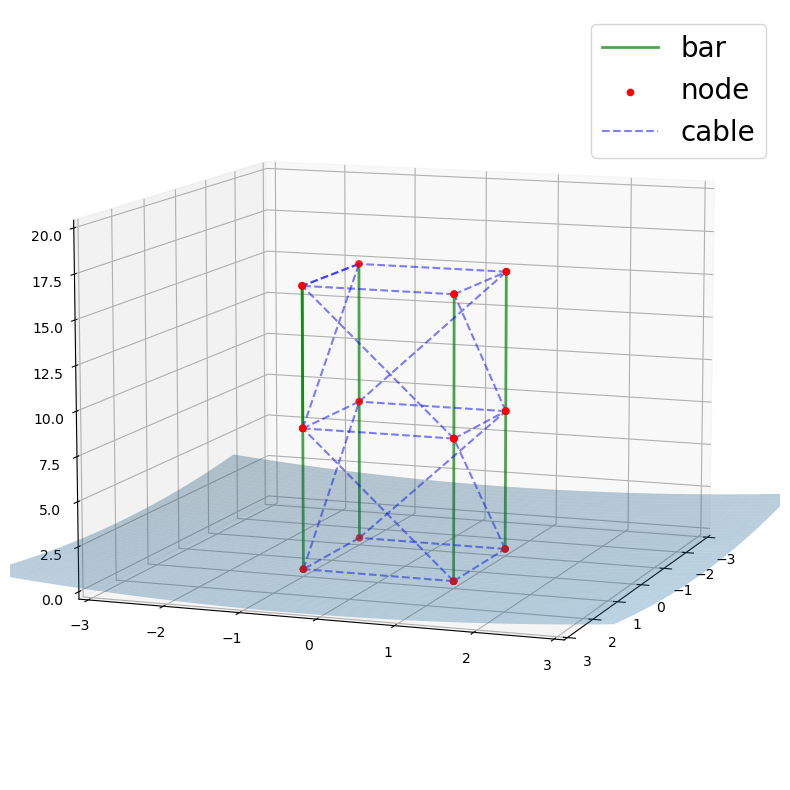

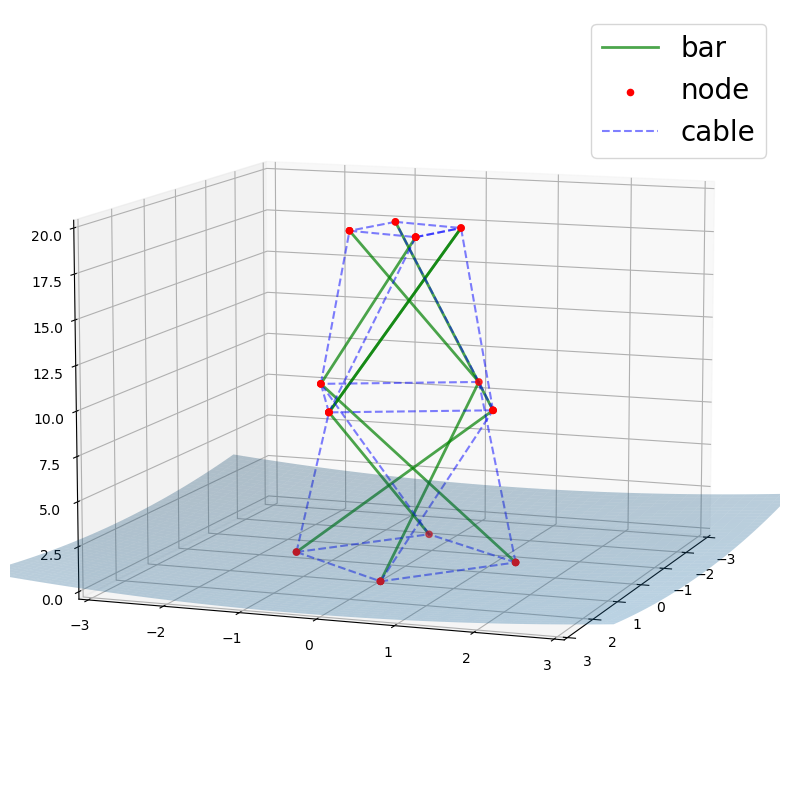

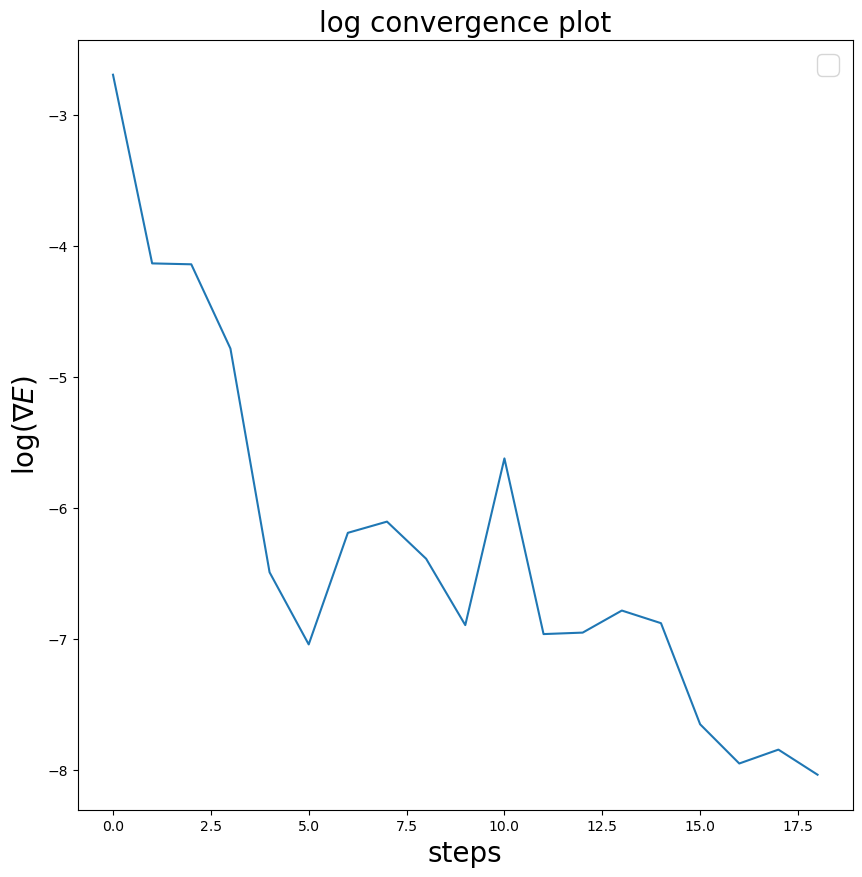

In [31]:
x = np.linspace(-4,4, 1000)
y = np.copy(x)
X1,Y1 = np.meshgrid(x,y)
z = (X1**2 + Y1**2)/20

plt.figure(figsize= (20,10))
ax1 = plt.axes(projection = '3d')
plot_bar_net(X, B, ax1)
plot_cable_net(X, A, ax1)
ax1.plot_surface(X1,Y1,z, alpha = 0.3)
ax1.view_init(10,20)
ax1.set_zlim(0,20)
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)

plt.figure(figsize= (20,10))
ax2 = plt.axes(projection = '3d')
plot_bar_net(X_BFGS, B, ax2)
plot_cable_net(X_BFGS, A, ax2)
ax2.plot_surface(X1,Y1,z, alpha = 0.3)
ax2.view_init(10,20)
ax2.set_zlim(0,20)
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)

index = range(len(error_BFGS_constrained))
plt.figure(figsize = (10,10))
plt.plot(index, np.log10(error_BFGS_constrained))
plt.xlabel(f'steps', fontsize = 20)
plt.ylabel(r'$\log(\nabla{E}$)', fontsize = 20)
plt.title(f'log convergence plot', fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('log_convergence_BFGS_strong_wolfe_constrained.png')